https://stackoverflow.com/questions/18390150/pls-da-algorithm-in-python

In [3]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [5]:
df = pd.read_csv("../data/Iris.csv")

In [6]:
y = df["Species"]
X = df.loc[:, df.columns != "Species"]

In [8]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
y_ohe = ohe.fit_transform(y.values.reshape(-1,1))
y_ohe = pd.DataFrame(y_ohe.toarray(), columns=ohe.get_feature_names_out())
y_ohe.head()

,x0_Iris-setosa,x0_Iris-versicolor,x0_Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [11]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y_ohe, random_state=42, train_size=0.8
)

In [16]:
n_components = 3  # 主成分の数
pls = PLSRegression(n_components=n_components)
pls.fit(X_std, y_ohe)

PLSRegression(n_components=3)

In [22]:
y_train_pred = pls.predict(X_train)
y_test_pred = pls.predict(X_test)

In [23]:
y_train_pred_label = np.argmax(y_train_pred, axis=1)
y_train_label = np.argmax(y_train, axis=1)
y_test_pred_label = np.argmax(y_test_pred, axis=1)
y_test_label = np.argmax(y_test, axis=1)

In [28]:
y_train_pred_label

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

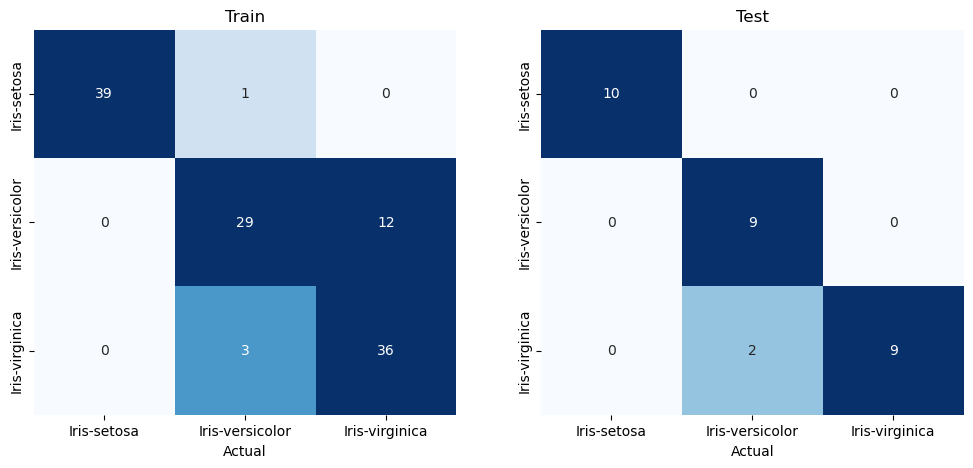

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
cm_train = confusion_matrix(y_train_label, y_train_pred_label)
cm_train_df = pd.DataFrame(cm_train, index=y.unique(), columns=y.unique())
sns.heatmap(
    cm_train_df, annot=True, fmt="d", cmap="Blues", ax=ax1, vmin=0, vmax=5, cbar=False
)
ax1.set_xlabel("Predict")
ax1.set_xlabel("Actual")
ax1.set_title("Train")

ax2 = fig.add_subplot(1, 2, 2)
cm_test = confusion_matrix(y_test_label, y_test_pred_label)
cm_test_df = pd.DataFrame(cm_test, index=y.unique(), columns=y.unique())
sns.heatmap(
    cm_test_df, annot=True, fmt="d", cmap="Blues", ax=ax2, vmin=0, vmax=5, cbar=False
)
ax2.set_xlabel("Predict")
ax2.set_xlabel("Actual")
ax2.set_title("Test")

# プロットの表示
plt.show()

In [30]:
# 主成分スコアの取得
X_scores = pls.x_scores_

# データフレームの作成
df = pd.DataFrame(
    {"PC1": X_scores[:, 0], "PC2": X_scores[:, 1], "PC3": X_scores[:, 2], "Label": y}
)

# 3次元散布図の作成（マーカーサイズを小さく設定）
fig = px.scatter_3d(
    df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Label",
    title="PLS Regression: First 3 Principal Components",
    labels={
        "PC1": "First Principal Component",
        "PC2": "Second Principal Component",
        "PC3": "Third Principal Component",
        "Label": "Class Label",
    },
    color_continuous_scale=px.colors.qualitative.Set1,
    size_max=5,
)  # マーカーの最大サイズを小さく設定

# マーカーサイズをさらに調整
fig.update_traces(marker=dict(size=3))  # すべてのマーカーのサイズを3に設定

# レイアウトの調整
fig.update_layout(
    scene=dict(xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3"),
    width=900,
    height=700,
    margin=dict(r=20, b=10, l=10, t=40),
)

# グラフの表示
fig.show()